In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium
plt.style.use('ggplot')
# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline
from plotnine import*

In [6]:
from matplotlib import font_manager,rc
font_n = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_n)

In [7]:
shop = pd.read_csv("C:/Users/Lee Jong Ann/Downloads/Untitled Folder 1/csv데이터/소상공인시장진흥공단_상가업소정보_201806_01.csv",encoding='cp949')

In [8]:
shop.shape

(476183, 39)

In [9]:
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
shop['시도명'].value_counts()

서울특별시    330089
부산광역시    146094
Name: 시도명, dtype: int64

In [11]:
shop_seoul = shop.loc[shop['시도명'] == '서울특별시']
shop_busan = shop.loc[shop['시도명'] == '부산광역시']

In [12]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

서울시와 부산시에서는 소매와 음식과 관련된 점포수가 압도적으로 많다
그리고 서울시와 부산시의 업종별 점포수가 거의 2배씩 차이 나는것을 알 수 있다. 


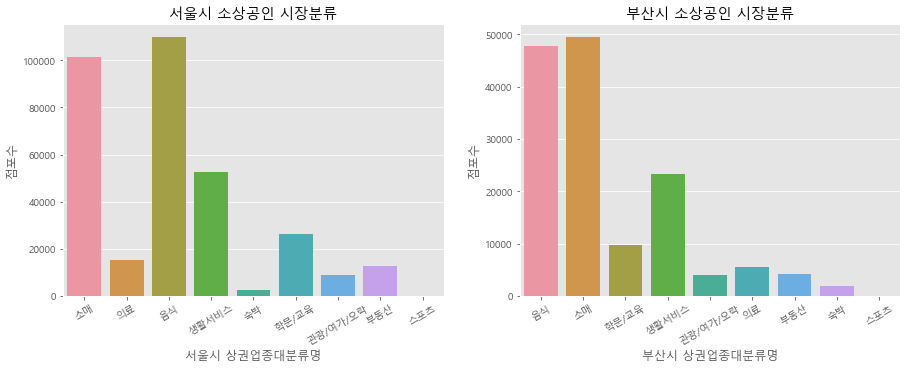

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plt.sca(ax1)
sns.countplot(data=shop_seoul,x='상권업종대분류명',ax=ax1)
plt.title("서울시 소상공인 시장분류")
plt.ylabel("점포수")
plt.xlabel("서울시 상권업종대분류명")
plt.xticks(rotation=30)

plt.sca(ax2)
sns.countplot(data=shop_busan,x='상권업종대분류명',ax=ax2)
plt.ylabel("점포수")
plt.xlabel("부산시 상권업종대분류명")
plt.title("부산시 소상공인 시장분류")
plt.xticks(rotation=30)

print("서울시와 부산시에서는 소매와 음식과 관련된 점포수가 압도적으로 많다")
print("그리고 서울시와 부산시의 업종별 점포수가 거의 2배씩 차이 나는것을 알 수 있다. ")

In [14]:
shop_seoul_meal=shop_seoul.loc[shop_seoul['상권업종대분류명'] == '음식'] 
shop_seoul_somae=shop_seoul.loc[shop_seoul['상권업종대분류명'] == '소매'] 

서울시 내에서는 한식과 관련된 업종이 압도적으로 많다는 것을 확인할 수 있다. 대략 35만개


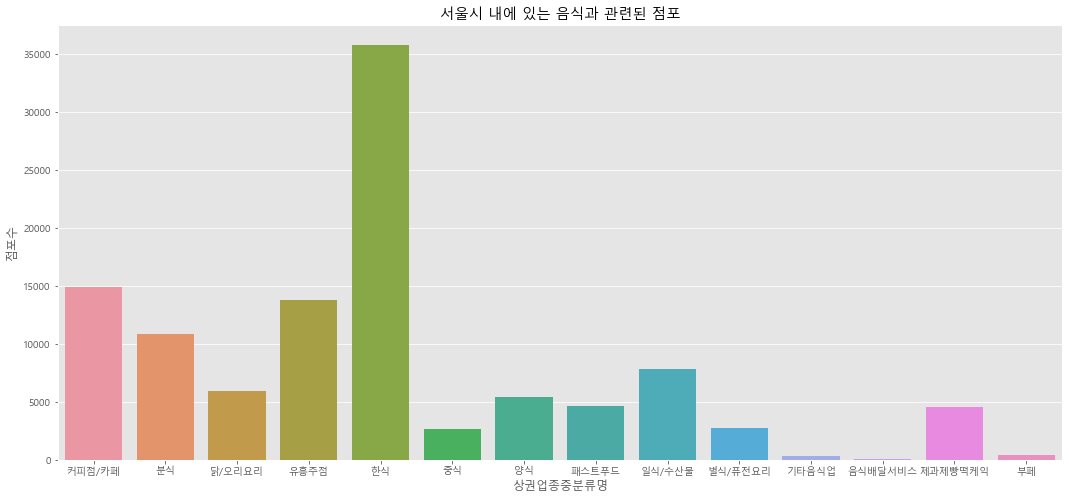

In [15]:
fig,ax3=plt.subplots()
fig.set_size_inches(18,8)

sns.countplot(data=shop_seoul_meal,x='상권업종중분류명',ax=ax3)
plt.title("서울시 내에 있는 음식과 관련된 점포")
plt.ylabel("점포수")
print("서울시 내에서는 한식과 관련된 업종이 압도적으로 많다는 것을 확인할 수 있다. 대략 35만개")

In [55]:
shop_seoul_meal_hansik = shop_seoul_meal.loc[shop_seoul_meal['상권업종중분류명'] == '한식']
shop_seoul_meal_hansik.shape

(35778, 39)

In [80]:
shop_seoul_meal_hansik['상권업종소분류명'].value_counts()

한식/백반/한정식    23721
갈비/삼겹살        4125
족발/보쌈전문       1628
해장국/감자탕       1366
곱창/양구이전문      1261
부대찌개/섞어찌개      751
냉면집            637
설렁탕집           529
추어탕전문          372
기타고기요리         366
파전전문           211
보리밥전문          164
쌈밥전문           117
순두부전문          107
두부요리전문         105
한정식전문          100
기사식당            92
돌솥/비빕밥전문점       60
황태전문            58
버섯전문점            6
재첩국전문            2
Name: 상권업종소분류명, dtype: int64

In [40]:
shop_seoul_meal['상호명'].value_counts()

이디야커피              337
스타벅스               235
김밥천국               215
파리바게뜨              199
간단하지만특별한화피디Cafe    193
                  ... 
대흥정육식당               1
마미치킨.쌍방울             1
더커피반                 1
바니카페                 1
서울큰입탕                1
Name: 상호명, Length: 76560, dtype: int64

In [29]:
shop_seoul_meal_best2 = shop_seoul_meal.loc[shop_seoul_meal['상호명'].str.contains('이디야커피|스타벅스')].copy()
shop_seoul_meal_best2.shape

(855, 39)

In [31]:
shop_seoul_meal_best2['브랜드명']=''

In [33]:
shop_seoul_meal_best2[['상호명','브랜드명']].head()

,상호명,브랜드명
1492,이디야커피,
1682,스타벅스종로3가점,
2419,이디야커피,
7271,이디야커피중계롯데우성점중계롯데우성점,
12008,이디야커피,


In [34]:
shop_seoul_meal_best2.loc[shop_seoul_meal_best2['상호명'].str.contains('이디야커피'),'브랜드명'] = '이디야'
shop_seoul_meal_best2.loc[shop_seoul_meal_best2['상호명'].str.contains('스타벅스'),'브랜드명'] = '스타벅스'

In [37]:
shop_seoul_meal_best2[['상호명','브랜드명']]

,상호명,브랜드명
1492,이디야커피,이디야
1682,스타벅스종로3가점,스타벅스
2419,이디야커피,이디야
7271,이디야커피중계롯데우성점중계롯데우성점,이디야
12008,이디야커피,이디야
...,...,...
470563,이디야커피,이디야
472654,스타벅스,스타벅스
472976,스타벅스,스타벅스
473703,이디야커피,이디야


In [44]:
shop_seoul_meal_best2.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '브랜드명'],
      dtype='object')

In [79]:
m = folium.Map(location=[shop_seoul_meal_best2['위도'].mean(),shop_seoul_meal_best2['경도'].mean()],zoom_start=12)

for i in shop_seoul_meal_best2.index[:]:
    if shop_seoul_meal_best2['브랜드명'][i] == '이디야':
        icon_color='pink'
    else:
        icon_color='blue'
    sub_lat=shop_seoul_meal_best2.loc[i,'위도'] 
    sub_long=shop_seoul_meal_best2.loc[i,'경도']
    title=shop_seoul_meal_best2.loc[i,'브랜드명'] + "-" + shop_seoul_meal_best2.loc[i,'도로명주소']
    folium.Marker([sub_lat,sub_long],popup=title,icon=folium.Icon(color=icon_color)).add_to(m)
m

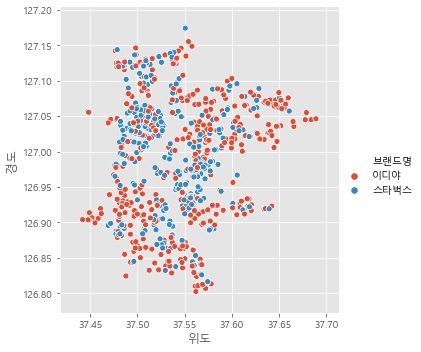

In [76]:
sns.relplot(data=shop_seoul_meal_best2,x='위도',y='경도',hue='브랜드명')